<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Redes Neurais
</font></h1>
<hr>

## **Case**: Steel Plates Fault

http://archive.ics.uci.edu/ml/datasets/steel+plates+faults

Dataset:

https://meusite.mackenzie.br/rogerio/STEEL_faults.csv

Um conjunto de dados de falhas em placas de aço, classificadas em 7 tipos diferentes. O objetivo é treinar um modelo deep learning para o reconhecimento automático de padrões.


Data Set Information:

Type of dependent variables (7 Types of Steel Plates Faults):

1.Pastry

2.Z_Scratch

3.K_Scatch

4.Stains

5.Dirtiness

6.Bumps

7.Other_Faults



# imports


In [ ]:
# imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

# Exercício. Acesse e Explore os Dados

Que transformações são necessárias para o treinamento dos dados?

In [ ]:
# Seu código



# Exercício. Prepare os Dados de Entrada `X`

Não é necessário tratamento de dados nulos. A normalização das entradas, entretanto, é necessária. Depois de fazer o a seleção dos atributos de `X` ( `X = df[['col1', 'col2', ... ]]` ), faça o `scale` dos dados. Empregue o `df.columns` para ajudar a obter o nome das colunas. 

In [ ]:
# Seu código



# Exercício. Prepare a saída `y`

Lembre-se no `Keras`/`TensorFlow` há uma saída binária para cada classe.

In [ ]:
# Seu código



# Exercício. Separe os dados de Treinamento e Teste

Empregue o scikit-learn para separar os dados de treinamento e teste. Empregue 0.3 de dados de teste e o `seed=1984` para geração dos dados. 

In [ ]:
# Seu código



# Exercício. Faça o Treinamento do Modelo Deep Learning

Empregue o modelo de código da aula de Teoria para completar o código abaixo e treine o Modelo Neural. Você vai configurar uma única camada oculta de 16 neurônios e função de ativação sigmoid.

In [ ]:
from numpy.random import seed  # para garantir a reprodutibilidade dos resultados
seed(1984)
tf.random.set_seed(1984)

# camada de entrada 
model = Sequential([layers.Dense(X.shape[1], activation='sigmoid', input_shape=[X.shape[1],])]) 

# entre aqui com uma camada oculta de 16 neurônios e função de ativação sigmoid
model.add(...

# entre aqui com a camada de saída
model.add(...

# entre aqui com a compilação do modelo com as métricas e métodos empregadas em teoria 
model.compile(...
              
# entre aqui com o treinamento do modelo com 0.2 dos dados para validação e 100 iterações de treinamento
history = model.fit(...

# Exercício. Visualize o modelo

Empregue o comando `model.summary()` para exibir o modelo. O código a seguir exibe graficamente a rede criada.

\* nota: o símbolo ? aparece na figura é empregado para outros modelos de rede.  

In [ ]:
# Seu código



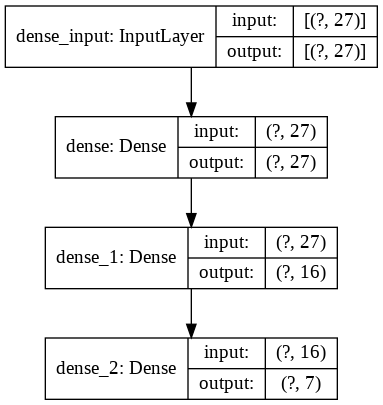

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Exercício. Analise o Treinamento da Rede

Empregue a função `plot_loss_acc` abaixo (veja a sintaxe da chamada na teoria) para analisar o treinamento da rede. 

In [ ]:
def plot_loss_acc(history,more_title=''):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(more_title + 'Accuracy Train: {:.2f} %, Accuracy Test: {:.2f} %'.format(acc[len(acc)-1] *100, val_acc[len(val_acc)-1]*100))

    return loss, val_loss, acc, val_acc


In [ ]:
# Seu código



# Exercício. Reduzindo o *Overfitting* (**RESOLVIDO**)

O *overfitting* ou sobreajuste é uma acuracidade excessiva do modelo no conjunto de treinamento. Isso pode levar a modelos pouco generalizados e, depois de outras métricas de acuracidade, é uma métrica que deve ser analisada para a qualidade do modelo.

Aqui empregaremos uma técnica chamada `drop out`. 

Epoch 1/100
49/49 [==============================] - 0s 3ms/step - loss: 1.8833 - accuracy: 0.2519 - val_loss: 1.7353 - val_accuracy: 0.0000e+00
Epoch 2/100
49/49 [==============================] - 0s 1ms/step - loss: 1.7842 - accuracy: 0.2519 - val_loss: 1.6854 - val_accuracy: 0.0000e+00
Epoch 3/100
49/49 [==============================] - 0s 2ms/step - loss: 1.7182 - accuracy: 0.2912 - val_loss: 1.6662 - val_accuracy: 0.0000e+00
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 1.6641 - accuracy: 0.4111 - val_loss: 1.6481 - val_accuracy: 0.0000e+00
Epoch 5/100
49/49 [==============================] - 0s 2ms/step - loss: 1.6181 - accuracy: 0.4581 - val_loss: 1.6418 - val_accuracy: 0.0000e+00
Epoch 6/100
49/49 [==============================] - 0s 2ms/step - loss: 1.5569 - accuracy: 0.4659 - val_loss: 1.6108 - val_accuracy: 0.0129
Epoch 7/100
49/49 [==============================] - 0s 2ms/step - loss: 1.4964 - accuracy: 0.4755 - val_loss: 1.6108 - val_accuracy: 

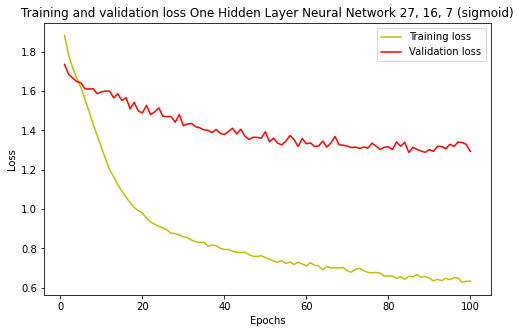

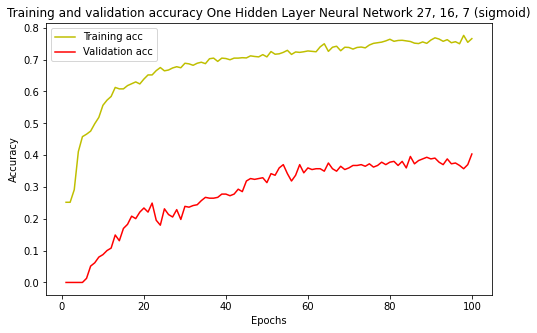

One Hidden Layer Neural Network 27, 16, 7 (sigmoid)Accuracy Train: 76.61 %, Accuracy Test: 40.36 %


In [ ]:
all_results = [] 
from keras.layers import Dropout

from numpy.random import seed
seed(1984)
tf.random.set_seed(1984)


model = Sequential([layers.Dense(X.shape[1], activation='sigmoid', input_shape=[X.shape[1],])]) 
model.add(Dropout(0.20))

model.add(layers.Dense(16, activation='sigmoid'))

model.add(layers.Dense(7, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

loss, val_loss, acc, val_acc = plot_loss_acc(history,'One Hidden Layer Neural Network 27, 16, 7 (sigmoid)')


# Exercício. Fazendo a Predição dos dados de Teste

Faça a predição dos casos de teste e analise os resultados empregando o `classification_report` do `scikit-learn`.

Lembre-se, cada neurônio de saída da rede retorna a probabilidade de uma das 7 classes. A seleção do neurônio com maior probabilidade retorna a classe mais provável (empregue o comando `np.argmax()`).

Veja a saída:

In [ ]:
model.predict(X_test)

array([[1.2285411e-03, 3.2676721e-01, 5.3519011e-04, ..., 8.7923821e-05,
        8.5521936e-03, 5.0891042e-03],
       [1.0488987e-02, 7.6484680e-04, 6.0473722e-05, ..., 3.0935109e-03,
        8.2548350e-02, 2.2359610e-02],
       [1.2728572e-04, 2.8482080e-04, 4.3940675e-01, ..., 5.4319241e-07,
        6.6319108e-04, 1.8430054e-03],
       ...,
       [3.4892559e-04, 1.8551946e-04, 4.8179200e-01, ..., 9.0032825e-07,
        7.1731210e-04, 3.7429631e-03],
       [2.6634336e-04, 2.3001432e-04, 4.6806443e-01, ..., 7.4996734e-07,
        6.5487623e-04, 2.9294193e-03],
       [2.1514893e-03, 1.7291307e-04, 2.1627545e-04, ..., 1.5753508e-04,
        7.7846378e-02, 1.4789104e-02]], dtype=float32)

In [ ]:
# Seu código



# Exercício. Faça o Treinamento de outros Modelos

Faça o treinamento de outras configurações até obter uma acuracidade do conjunto de validação superior a 0.74 (primeiro modelo) e discuta seus resultados.  

Epoch 1/100
49/49 [==============================] - 0s 4ms/step - loss: 1.8808 - accuracy: 0.2519 - val_loss: 1.7346 - val_accuracy: 0.0000e+00
Epoch 2/100
49/49 [==============================] - 0s 1ms/step - loss: 1.7795 - accuracy: 0.2519 - val_loss: 1.6848 - val_accuracy: 0.0000e+00
Epoch 3/100
49/49 [==============================] - 0s 1ms/step - loss: 1.7099 - accuracy: 0.3067 - val_loss: 1.6653 - val_accuracy: 0.0000e+00
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 1.6528 - accuracy: 0.4246 - val_loss: 1.6478 - val_accuracy: 0.0000e+00
Epoch 5/100
49/49 [==============================] - 0s 2ms/step - loss: 1.5940 - accuracy: 0.4620 - val_loss: 1.6391 - val_accuracy: 0.0000e+00
Epoch 6/100
49/49 [==============================] - 0s 1ms/step - loss: 1.5294 - accuracy: 0.4710 - val_loss: 1.6111 - val_accuracy: 0.0308
Epoch 7/100
49/49 [==============================] - 0s 1ms/step - loss: 1.4610 - accuracy: 0.4871 - val_loss: 1.6165 - val_accuracy: 

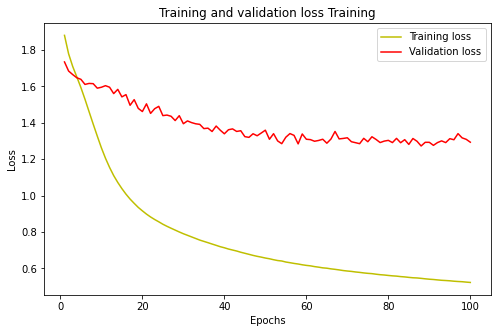

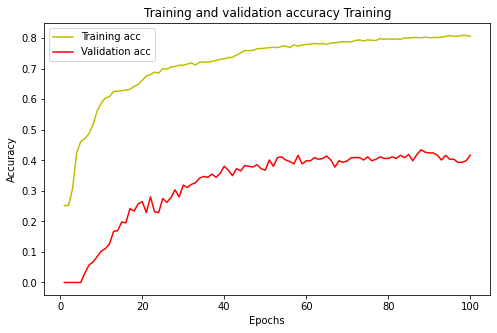

TrainingAccuracy Train: 80.61 %, Accuracy Test: 41.65 %


In [ ]:

# Aqui apenas o modelo original

from numpy.random import seed  # para garantir a reprodutibilidade dos resultados
seed(1984)
tf.random.set_seed(1984)

# camada de entrada 
model = Sequential([layers.Dense(X.shape[1], activation='sigmoid', input_shape=[X.shape[1],])]) 

# entre aqui com uma camada oculta de 16 neurônios e função de ativação sigmoid
model.add(layers.Dense(16, activation='sigmoid'))

# entre aqui com a camada de saída
model.add(layers.Dense(7, activation='sigmoid'))

# entre aqui com a compilação do modelo com as métricas e métodos empregadas em teoria 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# entre aqui com o treinamento do modelo com 0.2 dos dados para validação e 100 iterações de treinamento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

# plot
loss, val_loss, acc, val_acc = plot_loss_acc(history,'Training')
